In [3]:
# Copyright [2024] Stefan Dendorfer
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
import json
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns

try:
    # use latex in plot
    plt.rc('text', usetex=True)
except:
    print("not using latex")



In [4]:
'''For a quick workaround, use the data from run results on NAS-Bench 101 as 
provided. If you prefer to generate the run data yourself, run the command
    
    python ./scripts/create_run_data.py 
    
to create you own generated_run_data.json file. 
'''

# Specify you own path if generated 

# with open('./../data/generated_run_data.json', 'r') as f:
with open('./../provided_data/provided_run_data.json', 'r') as f:
    data = json.load(f)

valids_30 = data['valids_30']
valids_1000 = data['valids_1000']

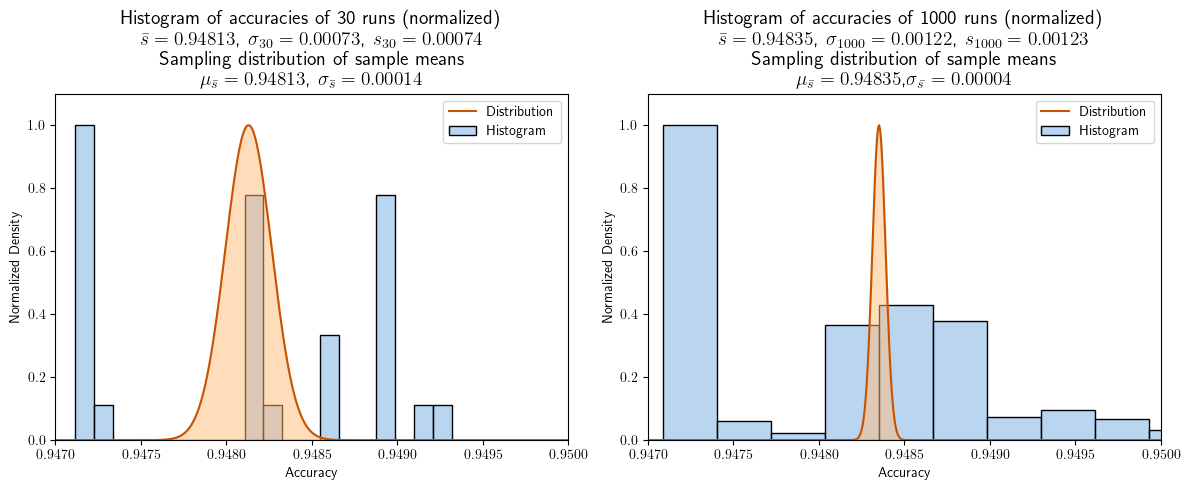

In [5]:
'''Now, we use the results to create the a histogram of the run data and a 
probability distributions plots in same plot'''

# Constants
precision = 5
title_fontsize = 14
bins = 20
x_limits = (0.947, 0.95)
x_linspace = np.linspace(x_limits[0], x_limits[1], 500)
# colors from tableau-colorblind10
tc = {'Light Blue': '#A2C8EC','Red Orange': '#C85200','Light Orange': '#FFBC79'}

# Calculate mean and standard deviation
mean_30 = np.mean(valids_30)
std_30 = np.std(valids_30)
estimated_pop_std_30 = np.std(valids_30, ddof=1) # unbiased correction

mean_1000 = np.mean(valids_1000)
std_1000 = np.std(valids_1000)
estimated_pop_std_1000 = np.std(valids_1000, ddof=1)  # unbiased correction

# Calculate Gaussian distribution parameters
clt_std_30 = estimated_pop_std_30 / math.sqrt(30)
clt_std_1000 = estimated_pop_std_1000 / math.sqrt(1000)


# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plotting the histogram and Gaussian distribution for n=30
hist_data_30 = sns.histplot(valids_30, 
                            bins=bins, 
                            kde=False, 
                            ax=axes[0], 
                            stat='density', 
                            color=tc['Light Blue'], 
                            label='Histogram')
y_30 = norm.pdf(x_linspace, mean_30, clt_std_30)

# Normalize histogram
hist_values_30 = [patch.get_height() for patch in hist_data_30.patches]
max_hist_30 = max(hist_values_30)
for patch in hist_data_30.patches:
    patch.set_height(patch.get_height() / max_hist_30)

# Normalize Gaussian
y_30 /= max(y_30)

axes[0].fill_between(x_linspace, y_30, color=tc['Light Orange'], alpha=0.5)
axes[0].plot(x_linspace, y_30, label='Distribution', color=tc['Red Orange'])
axes[0].set_title(f'Histogram of accuracies of 30 runs (normalized)\n'
                  f'$\\bar{{s}}={mean_30:.{precision}f} $,'
                  f'$\\ \sigma_{{30}}={std_30:.{precision}f} $,'
                  f'$\\ s_{{30}}={estimated_pop_std_30:.{precision}f}$ '
                  f'\n Sampling distribution of sample means \n'
                  f'$\\mu_{{\\bar{{s}}}}={mean_30:.{precision}f}$,'
                  f' $\\sigma_{{\\bar{{s}}}}={clt_std_30:.{precision}f}$',
                  fontsize=title_fontsize)

axes[0].set_xlabel('Accuracy')
axes[0].set_ylabel('Normalized Density')
axes[0].set_xlim(x_limits)
axes[0].set_ylim(0, 1.1) 
axes[0].legend()

# Plotting the histogram and Gaussian distribution for n=1000
hist_data_1000 = sns.histplot(valids_1000, 
                              bins=bins, 
                              kde=False, 
                              ax=axes[1], 
                              stat='density', 
                              color=tc['Light Blue'], 
                              label='Histogram')
y_1000 = norm.pdf(x_linspace, mean_1000, clt_std_1000)

# Normalize histogram
hist_values_1000 = [patch.get_height() for patch in hist_data_1000.patches]
max_hist_1000 = max(hist_values_1000)
for patch in hist_data_1000.patches:
    patch.set_height(patch.get_height() / max_hist_1000)

# Normalize Gaussian
y_1000 /= max(y_1000)

axes[1].fill_between(x_linspace, y_1000, color=tc['Light Orange'], alpha=0.5)
axes[1].plot(x_linspace, y_1000, label='Distribution', color=tc['Red Orange'])
axes[1].set_title(f'Histogram of accuracies of 1000 runs (normalized)\n'
                  f'$\\bar{{s}}={mean_1000:.{precision}f} $,'
                  f'$\\ \sigma_{{1000}}={std_1000:.{precision}f} $,'
                  f'$\\ s_{{1000}}={estimated_pop_std_1000:.{precision}f}$'
                  f'\n Sampling distribution of sample means \n'
                  f'$\\mu_{{\\bar{{s}}}}={mean_1000:.{precision}f}$,'
                  f'$\\sigma_{{\\bar{{s}}}}={clt_std_1000:.{precision}f}$',
                  fontsize=title_fontsize)



axes[1].set_xlabel('Accuracy')
axes[1].set_ylabel('Normalized Density')
axes[1].set_xlim(x_limits)
axes[1].set_ylim(0, 1.1) 
axes[1].legend()

plt.tight_layout()
plt.show()
